# TensorFlow Hub - Style transfer

- Based on: https://www.tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization?hl=pt-br
- Paper: https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Gatys_Image_Style_Transfer_CVPR_2016_paper.pdf

# Importing the libraries

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
print('TensorFlow version: ', tf.__version__)
print('TensorFlow Hub version: ', hub.__version__)

TensorFlow version:  2.8.2
TensorFlow Hub version:  0.12.0


# Preprocessing the images

In [ ]:
content_image_path = '/content/room-gc3a2b0047_1280.jpg'
style_image_path = '/content/style.jpg'

In [ ]:
def load_image(path, size = (256, 256)):
  image_path = tf.keras.utils.get_file(path, path)
  #print(image_path)
  image = tf.io.decode_image(tf.io.read_file(image_path), channels = 3, dtype = tf.float32)[tf.newaxis, ...]
  #print(type(image), image.shape)
  image = tf.image.resize(image, size, preserve_aspect_ratio=True)
  return image

In [ ]:
content_image = load_image(content_image_path, (384, 384))
style_image = load_image(style_image_path)

In [ ]:
content_image.shape, style_image.shape

(TensorShape([1, 216, 384, 3]), TensorShape([1, 256, 252, 3]))

In [ ]:
def show_images(images, titles = []):
  number_images = len(images)
  #print(number_images)
  plt.figure(figsize = (12,12))
  gs = gridspec.GridSpec(1, number_images)
  for i in range(number_images):
    #print(i)
    plt.subplot(gs[i])
    plt.axis('off')
    plt.imshow(images[i][0])
    plt.title(titles[i])

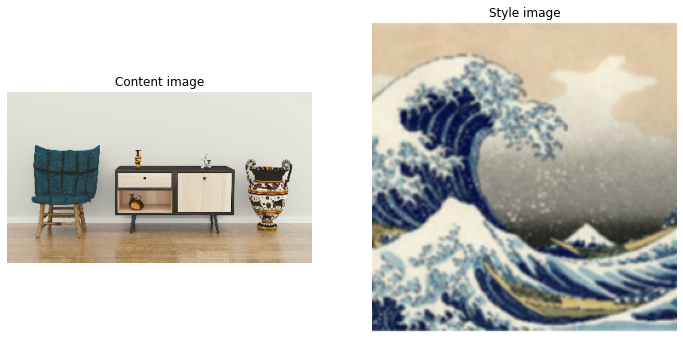

In [ ]:
show_images([content_image, style_image], ['Content image', 'Style image'])

# Style transfer

In [ ]:
model_path = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
model = hub.load(model_path)

In [ ]:
results = model(tf.constant(content_image), tf.constant(style_image))

In [ ]:
results

[<tf.Tensor: shape=(1, 216, 384, 3), dtype=float32, numpy=
 array([[[[0.88413125, 0.8504709 , 0.7977515 ],
          [0.8881422 , 0.85144114, 0.80693424],
          [0.8827574 , 0.84075516, 0.8055377 ],
          ...,
          [0.8603278 , 0.80015403, 0.6012113 ],
          [0.86916953, 0.8218782 , 0.5925017 ],
          [0.9060199 , 0.8570895 , 0.67205644]],
 
         [[0.8865754 , 0.8534274 , 0.78428566],
          [0.89057314, 0.8533728 , 0.79451144],
          [0.88494575, 0.840715  , 0.78971577],
          ...,
          [0.86706764, 0.8066356 , 0.61089027],
          [0.87718046, 0.8300093 , 0.60585034],
          [0.9171457 , 0.8691784 , 0.69440365]],
 
         [[0.8886601 , 0.8586324 , 0.7685555 ],
          [0.89496374, 0.8617263 , 0.7796118 ],
          [0.8917303 , 0.8532742 , 0.776413  ],
          ...,
          [0.8710593 , 0.8126663 , 0.61831474],
          [0.8806572 , 0.83390754, 0.6133863 ],
          [0.9231062 , 0.87680864, 0.70716345]],
 
         ...,
 
       

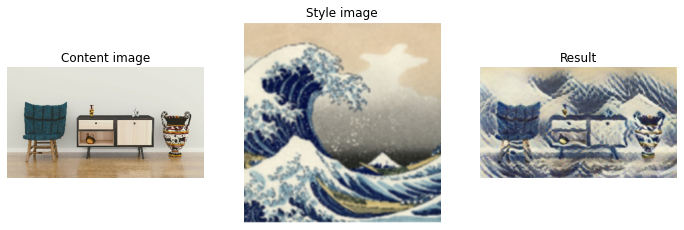

In [ ]:
show_images([content_image, style_image, results[0]], ['Content image', 'Style image', 'Result'])